In [2]:
import pandas as pd
import numpy as np
from itertools import islice
from tqdm import tqdm

In [3]:
df = pd.read_csv('../data/train.csv', sep=';')

In [5]:
df.group.describe()

count            20345
unique              15
top       Редкие книги
freq              2025
Name: group, dtype: object

In [3]:
max([len(r.description) for i, r in df.fillna("").iterrows()])

2888

In [4]:
df.head()

,object_id,name,description,group,img_name
0,10669820,Водолей - коник (фрагмент - голова),"сероглиняный, лепной, со сплошным белым ангобо...",Археология,7862029.jpg
1,4489444,Винтовка «Самозарядная винтовка Токарева» (мет...,"На стволе имеется надульник, на торце которог...",Оружие,9461061.jpg
2,8722586,Инструмент. Калибр-скоба,Прямоугольная пластина с усечёнными углами и д...,Прочие,5095122.jpg
3,3712248,"Судомодель. НИС ""Космонавт Виктор Пацаев"".","Корпус модели, надстройки, шлюпки выполнены и...",Прочие,551422.jpg
4,6339754,Сабля.,NaN,Оружие,2592073.jpg


<Axes: xlabel='group'>

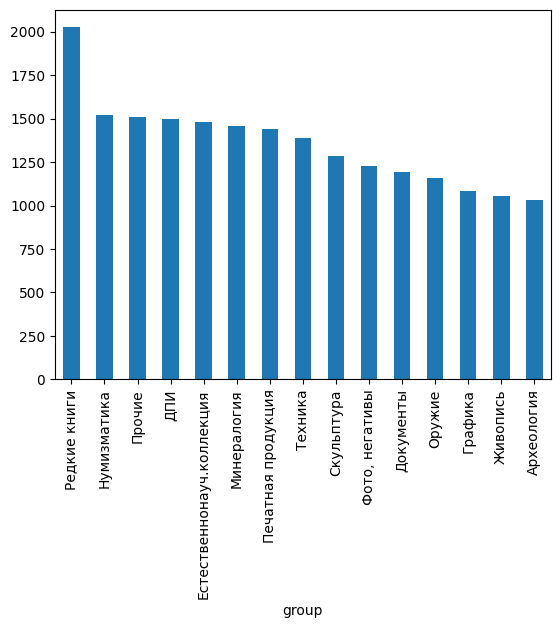

In [5]:
df.group.value_counts().plot(kind='bar')

In [6]:
idx2class = dict(zip(range(len(df.group.unique())),df.group.unique()))
class2idx = dict(zip(df.group.unique(), range(len(df.group.unique()))))

In [7]:
idx2class

{0: 'Археология',
 1: 'Оружие',
 2: 'Прочие',
 3: 'Нумизматика',
 4: 'Фото, негативы',
 5: 'Редкие книги',
 6: 'Документы',
 7: 'Печатная продукция',
 8: 'ДПИ',
 9: 'Скульптура',
 10: 'Графика',
 11: 'Техника',
 12: 'Живопись',
 13: 'Естественнонауч.коллекция',
 14: 'Минералогия'}

In [8]:
class2idx

{'Археология': 0,
 'Оружие': 1,
 'Прочие': 2,
 'Нумизматика': 3,
 'Фото, негативы': 4,
 'Редкие книги': 5,
 'Документы': 6,
 'Печатная продукция': 7,
 'ДПИ': 8,
 'Скульптура': 9,
 'Графика': 10,
 'Техника': 11,
 'Живопись': 12,
 'Естественнонауч.коллекция': 13,
 'Минералогия': 14}

In [9]:
import pickle, json

In [14]:
with open('../data/idx2class.pkl', 'wb') as f:
    pickle.dump(idx2class, f)

In [25]:
with open('../data/idx2class.json', 'w') as f:
    json.dump(idx2class, f, ensure_ascii=False)

## Prepare df for train

In [10]:
df

,object_id,name,description,group,img_name
0,10669820,Водолей - коник (фрагмент - голова),"сероглиняный, лепной, со сплошным белым ангобо...",Археология,7862029.jpg
1,4489444,Винтовка «Самозарядная винтовка Токарева» (мет...,"На стволе имеется надульник, на торце которог...",Оружие,9461061.jpg
2,8722586,Инструмент. Калибр-скоба,Прямоугольная пластина с усечёнными углами и д...,Прочие,5095122.jpg
3,3712248,"Судомодель. НИС ""Космонавт Виктор Пацаев"".","Корпус модели, надстройки, шлюпки выполнены и...",Прочие,551422.jpg
4,6339754,Сабля.,NaN,Оружие,2592073.jpg
...,...,...,...,...,...
20340,19945381,La Sainte Bible avec des explications & reflex...,"В переплете коричневой кожи, на корешке три н...",Редкие книги,20653985.jpg
20341,10334174,Фрагмент ручки синопской амфоры с сохранившимс...,NaN,Археология,41217662.jpg
20342,4708600,Шашка кавказская.(ножны),NaN,Оружие,1766049.jpg
20343,9622688,Висмутин,Висмутин. Зёрна в кварце,Минералогия,6305416.jpg


In [9]:
df.drop(['object_id', 'name', 'description'], axis=1, inplace=True)

## Make path to files

In [10]:
from pathlib import Path
import shutil

In [11]:
ROOT = Path('/home/free4ky/projects/museum_search/data/images')
TRAIN = '/home/free4ky/projects/museum_search/data/train'

In [35]:
files = list(Path(TRAIN).rglob('*.jpg'))

In [37]:
files[0].name

'57822638.jpg'

In [40]:
# for f in files:
#     shutil.copy(f, ROOT / f.name)

In [14]:
fls = list(Path(ROOT).rglob('*.jpg'))

In [57]:
len(fls) == len(df)

False

In [15]:
len(fls)

20342

In [58]:
len(df)

20345

In [12]:
df

,group,img_name
0,Археология,7862029.jpg
1,Оружие,9461061.jpg
2,Прочие,5095122.jpg
3,Прочие,551422.jpg
4,Оружие,2592073.jpg
...,...,...
20340,Редкие книги,20653985.jpg
20341,Археология,41217662.jpg
20342,Оружие,1766049.jpg
20343,Минералогия,6305416.jpg


In [13]:
paths = []
for i, row in df.iterrows():
    paths.append(ROOT / row.img_name)

In [14]:
from PIL import Image

In [15]:
df['path'] = paths

## Create tensor dataset

In [16]:
import sys
sys.path.append('..')
from services.adapter.src.wrappers.triton_wrapper import TritonWrapper
import yaml

In [17]:
config = yaml.safe_load(Path('../configs/config.yaml').read_text())

In [18]:
model = TritonWrapper(config["triton_vision_model"])

2024-04-13 01:59:17.708 | INFO     | services.adapter.src.wrappers.triton_wrapper:__init__:21 - Config has been loaded


In [19]:
from transformers import Blip2Processor

/home/free4ky/projects/museum_search/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
processor = Blip2Processor.from_pretrained('../weights/blip2_t5/model')

In [21]:
def batched(iterable, n):
    "Batch data into tuples of length n. The last batch may be shorter."
    # batched('ABCDEFG', 3) --> ABC DEF G
    if n < 1:
        raise ValueError('n must be at least one')
    it = iter(iterable)
    while (batch := tuple(islice(it, n))):
        yield batch

In [22]:
BATCH_SIZE = 8

In [23]:
df = df.replace(class2idx)

/tmp/ipykernel_10328/968716725.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(class2idx)


In [24]:
df

,group,img_name,path
0,0,7862029.jpg,/home/free4ky/projects/museum_search/data/imag...
1,1,9461061.jpg,/home/free4ky/projects/museum_search/data/imag...
2,2,5095122.jpg,/home/free4ky/projects/museum_search/data/imag...
3,2,551422.jpg,/home/free4ky/projects/museum_search/data/imag...
4,1,2592073.jpg,/home/free4ky/projects/museum_search/data/imag...
...,...,...,...
20340,5,20653985.jpg,/home/free4ky/projects/museum_search/data/imag...
20341,0,41217662.jpg,/home/free4ky/projects/museum_search/data/imag...
20342,1,1766049.jpg,/home/free4ky/projects/museum_search/data/imag...
20343,14,6305416.jpg,/home/free4ky/projects/museum_search/data/imag...


In [27]:
# def vectorize_dataset():
X = []
y = []
j = 0
with tqdm(total=len(df)) as pbar:
    for batch in batched(df.iterrows(), BATCH_SIZE):
        b_images, b_labels, b_paths = [], [], []
        for i, b in batch:
            b_images.append(Image.open(b.path))
            b_labels.append(b.group)
            b_paths.append(b.path)
        pixel_values = processor(b_images, return_tensors="np")["pixel_values"].astype(np.float16)
        b_vectors = model(pixel_values)[1]
        X.extend(b_vectors)
        y.extend(b_labels)
        pbar.update(BATCH_SIZE)
        if j % 100:
            np.save('../data/vectors.npy', np.array(X))
            np.save('../data/labels.npy', np.array(y))
        j += 1
np.save('../data/vectors.npy', np.array(X))
np.save('../data/labels.npy', np.array(y))

  0%|          | 0/20345 [00:00<?, ?it/s]2024-04-13 02:05:13.225 | INFO     | services.adapter.src.wrappers.triton_wrapper:__call__:38 - Starting inference...
2024-04-13 02:05:13.226 | INFO     | services.adapter.src.wrappers.triton_wrapper:_make_client:26 - Client has been initialized
  0%|          | 8/20345 [00:00<20:41, 16.38it/s]2024-04-13 02:05:13.956 | INFO     | services.adapter.src.wrappers.triton_wrapper:__call__:38 - Starting inference...
2024-04-13 02:05:13.957 | INFO     | services.adapter.src.wrappers.triton_wrapper:_make_client:26 - Client has been initialized
  0%|          | 16/20345 [00:01<26:07, 12.97it/s]2024-04-13 02:05:14.472 | INFO     | services.adapter.src.wrappers.triton_wrapper:__call__:38 - Starting inference...
2024-04-13 02:05:14.473 | INFO     | services.adapter.src.wrappers.triton_wrapper:_make_client:26 - Client has been initialized
  0%|          | 24/20345 [00:01<24:14, 13.97it/s]2024-04-13 02:05:14.968 | INFO     | services.adapter.src.wrappers.trito

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
TEST_SIZE = 0.1

In [31]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=TEST_SIZE)

In [33]:
train_X, val_x, train_y, val_y = train_test_split(train_X, train_y, test_size=TEST_SIZE)

In [34]:
len(train_X), len(train_y), len(test_X), len(test_y), len(val_x), len(val_y)

(16479, 16479, 2035, 2035, 1831, 1831)

In [ ]:
train:
  embeds: data/embeds_train.npy
  labels: data/labels_train.npy
val:
  embeds: data/embeds_val.npy
  labels: data/labels_val.npy
test:
  embeds: data/embeds_test.npy
  labels: data/labels_test.npy

In [36]:
np.save('../data/embeds_train.npy',train_X)
np.save('../data/labels_train.npy',train_y)

np.save('../data/embeds_val.npy',val_x)
np.save('../data/labels_val.npy',val_y)

np.save('../data/embeds_test.npy',test_X)
np.save('../data/labels_test.npy',test_y)